In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
lots = pd.read_csv('data/Lots.csv')

# Classification des attributs

In [4]:
lots_metadata = pd.read_csv('data/Lots_metadata.csv')

In [5]:
lots_metadata

,variable,signification,nature
0,lotId,Clé primaire,Catégorielle
1,tedCanId,ID TED de l’avis d’attribution du lot,Catégorielle
2,correctionsNb,Nombre de correctifs publiés pour ce lot,Numérique
3,cancelled,Booléen indiquant si l’appel d’offres du lot a été annulé,Catégorielle
4,awardDate,Date à laquelle la décision d’attribution a été prise pour ce lot,Catégorielle
5,awardEstimatedPrice,Estimation du prix du lot effectuée dans l’appel d’offres,Catégorielle
6,awardPrice,Prix effectif du lot indiqué dans l’avis d’attribution,Catégorielle
7,cpv,Code Common Procurement Vocabulary du lot,Catégorielle
8,numberTenders,Nombre d’offres effectuées pour le lot,Numérique
9,onBehalf,Booléen indiquant que l’acheteur est un groupement,Catégorielle


## Distribution de la nature

In [6]:
nature = lots_metadata['nature']

In [7]:
nature_vc = nature.value_counts()

In [8]:
nature_vc

Catégorielle    22
Numérique        4
Name: nature, dtype: int64

In [9]:
data = pd.DataFrame({
        'label':nature_vc.index.values
})
data["nature"] = nature_vc.values
data["proportion"] = (data["nature"]/ data["nature"].sum())*100

In [10]:
data

,label,nature,proportion
0,Catégorielle,22,84.615385
1,Numérique,4,15.384615


Nous pouvons voir que sur **26** variables, nous n'avons que **4 (15.38%)** qui sont numériques et les autres sont catégorielles

In [11]:
import matplotlib.pyplot as plt

In [12]:
def plot_nature_1(data, logy=True):
    # Creating the bar plot
    plt.figure(figsize=(8, 6))
    
    # Utiliser une colormap pour les couleurs des barres
    colors = plt.cm.viridis(data["proportion"]/100) 

    # Ajouter une barre de couleur (légende) pour indiquer les valeurs
    cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))
    cbar.set_label('Couleurs')
    
    X = data["label"]
    y = data["proportion"]
    plt.bar(X, y, color=colors)
    # Adding titles and labels
    plt.title("Nature des variables")
    plt.xlabel("Nature")
    plt.ylabel("Proportion des variables")
    # plt.xticks(rotation=90)
    if logy:
        plt.yscale('log')
    plt.show()

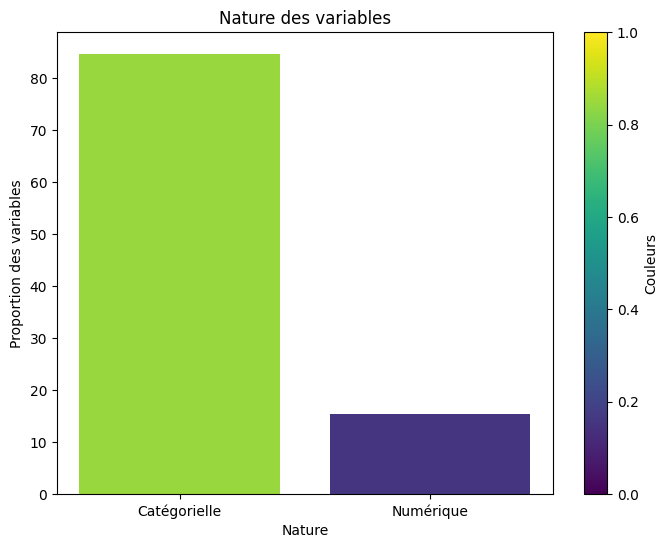

In [13]:
plot_nature_1(data, logy=False)

# Les corrélations à calculer

Nous avons **26 attributs**, pour calculer les correlations, nous commençons d'abord par enlever les identificants ou codes, car leur objectif c'est juste d'identifier les éléments.

Dans notre cas nous avons **3 attributs** qui sont des codes: **lotId**, **tedCanId** et **cpv**

Donc il nous reste **23 variables** et dans ces **23 attributs**, nous enlevons ceux qui ont assez de valeurs manquantes, c'est-à-dire dont la proportion de valeurs manquantes est **supérieure ou égale à 50%**

In [14]:
nan_counts_df = lots.isna().sum().reset_index()
nan_counts_df.columns = ['variable', 'nan_count']
nan_counts_df['proprotion'] = (nan_counts_df['nan_count']/len(lots))*100
nan_counts_df['calculer'] = nan_counts_df['proprotion'].apply(lambda x: 'OUI' if x < 50 else 'NON')

In [15]:
nan_counts_df

,variable,nan_count,proprotion,calculer
0,lotId,0,0.000000,OUI
1,tedCanId,0,0.000000,OUI
2,correctionsNb,0,0.000000,OUI
3,cancelled,0,0.000000,OUI
4,awardDate,186671,13.517432,OUI
5,awardEstimatedPrice,1191352,86.269529,NON
6,awardPrice,426323,30.871383,OUI
7,cpv,71,0.005141,OUI
8,numberTenders,424099,30.710337,OUI
9,onBehalf,282543,20.459823,OUI


In [16]:
to_calcul_df = nan_counts_df[
    (~nan_counts_df['variable'].isin(['lotId', 'tedCanId', 'cpv']))&
    (nan_counts_df['calculer'] == 'OUI')
].reset_index(drop=True)

In [17]:
to_calcul_df

,variable,nan_count,proprotion,calculer
0,correctionsNb,0,0.000000,OUI
1,cancelled,0,0.000000,OUI
2,awardDate,186671,13.517432,OUI
3,awardPrice,426323,30.871383,OUI
4,numberTenders,424099,30.710337,OUI
5,onBehalf,282543,20.459823,OUI
6,fraAgreement,0,0.000000,OUI
7,lotsNumber,295428,21.392867,OUI
8,outOfDirectives,0,0.000000,OUI
9,subContracted,681245,49.331084,OUI


In [18]:
import math

In [19]:
n_variables = len(to_calcul_df)
n_correlations = math.factorial(n_variables) // (math.factorial(2)*math.factorial(n_variables-2))

In [20]:
n_variables

16

In [21]:
n_correlations

120

Après calcul nous reste **16 variables** donc nous avons :

$$ C_{16}^{2} = \frac{16!}{2!(16-2)!}$$

Ce qui nous fait **120** correlations à calculer

# Correlation entre cancelled et correctionsNb

In [22]:
df = lots[['correctionsNb', 'cancelled']]

In [23]:
df

,correctionsNb,cancelled
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1380960,0,0
1380961,0,0
1380962,0,0
1380963,0,0


In [24]:
df['cancelled'].value_counts()

0    1380685
1        280
Name: cancelled, dtype: int64

In [25]:
df['correctionsNb'].value_counts()

0    1375786
1       5089
2         90
Name: correctionsNb, dtype: int64

## Graphe de corrélation

In [26]:
gb_1 = df.groupby(['cancelled', 'correctionsNb']).size().unstack(fill_value=0)

In [27]:
gb_1

correctionsNb,0,1,2
cancelled,,,
0,1375507,5088,90
1,279,1,0


In [28]:
def corr_cancelled_correctionsNb_1(data, logy=True):
    data.plot(kind='bar', stacked=False)
    # Adding titles and labels
    plt.title("Correlation entre annulation et nombre de correction")
    plt.xlabel('Annulation')
    plt.ylabel('Nombre de correction')
    if logy:
        plt.yscale('log')
    plt.show()

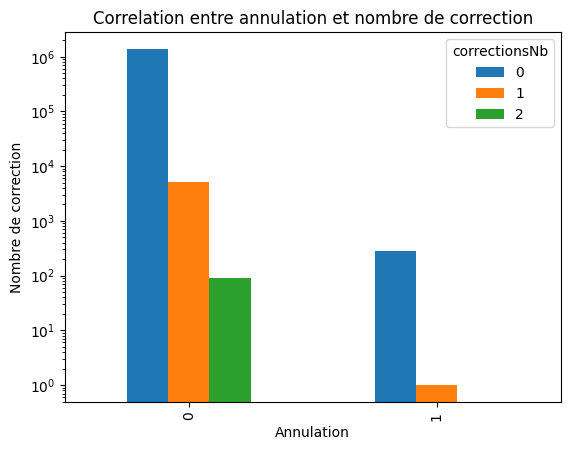

In [29]:
corr_cancelled_correctionsNb_1(gb_1)

Nous pouvons voir que le plus grand nombre de lots sont les lots n'ayant pas été modifié et n'ayant pas été annulé

## Coéfficient de corrélation

La variable **cancelled** étant une variable **catégorielle binaire** et **correctionsNb** étant une variable numérique, nous allons étudier le **coefficient de corrélation bisérial point** pour mésurer la correlation entre ces 2 variables

In [30]:
from scipy.stats import pointbiserialr

In [31]:
binary_attribute = df['cancelled'].astype('category')
numeric_attribute= df['correctionsNb'].astype(int)
corr_coeff, p_value = pointbiserialr(binary_attribute, numeric_attribute)

In [32]:
corr_coeff

-5.542318591446514e-05

Nous pouvons voir que cette valeur valeur est **négative** et **assez proche de 0**, donc nous pouvons dire qu'il n'y a **pas de correlation** entre le nombre de correction apporté à un lot et son annulatiaon

In [33]:
p_value

0.9480703249740478

Le fait que la valeur de **p_value** soit aussi **élévée** nous permet de dire que la corrélation entre le nombre de lots et son annulation est **simplement dû au hasard** ou n'est pas **statistiquement significatif**

Vu que les 2 variables n'ont pas assez de valeurs unique, nous pouvons créer un tableau de contigence pour ces variables puis calculer le coefficient de corrélation

In [34]:
from scipy.stats import chi2_contingency

In [35]:
var1 = df['cancelled'].astype('category')
var2 = df['correctionsNb'].astype('category')

In [36]:
contingency_table = pd.crosstab(var1, var2)

In [37]:
contingency_table

correctionsNb,0,1,2
cancelled,,,
0,1375507,5088,90
1,279,1,0


In [38]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
cramer_v = (chi2 / n)**0.5

In [39]:
chi2

0.01924284673420908

Cette valeur étant petite celà veut dire ces 2 variables sont **indépendantes**

In [40]:
p

0.9904247144376845

Une grande pour p implique que les valeurs sont **indépendantes**

In [41]:
cramer_v

0.00011804383884902163

Une petite valeur pour **crammer_v** implique les variables ne sont pas associées

# Correlation entre cancelled et numberTenders

In [42]:
df = lots[['numberTenders', 'cancelled']]

In [43]:
df

,numberTenders,cancelled
0,NaN,0
1,NaN,0
2,NaN,0
3,11.0,0
4,6.0,0
...,...,...
1380960,2.0,0
1380961,2.0,0
1380962,3.0,0
1380963,1.0,0


In [44]:
df_new = df.dropna()

In [45]:
df_new['numberTenders'] = df_new['numberTenders'].astype(int)

In [46]:
df_new

,numberTenders,cancelled
3,11,0
4,6,0
8,5,0
9,2,0
10,4,0
...,...,...
1380960,2,0
1380961,2,0
1380962,3,0
1380963,1,0


## Graphe de corrélation

In [47]:
numberTenders = df_new['numberTenders']

In [48]:
bins = [numberTenders.min() - 1, 2, 4, 6, numberTenders.max()]
df_new['interval'] = pd.cut(numberTenders, bins=bins, precision=0)

In [49]:
df_new

,numberTenders,cancelled,interval
3,11,0,"(6, 999]"
4,6,0,"(4, 6]"
8,5,0,"(4, 6]"
9,2,0,"(-1, 2]"
10,4,0,"(2, 4]"
...,...,...,...
1380960,2,0,"(-1, 2]"
1380961,2,0,"(-1, 2]"
1380962,3,0,"(2, 4]"
1380963,1,0,"(-1, 2]"


In [50]:
gb_1 = df_new.groupby(['cancelled', 'interval']).size().unstack(fill_value=0)

In [51]:
gb_1

interval,"(-1, 2]","(2, 4]","(4, 6]","(6, 999]"
cancelled,,,,
0,327838,296240,146472,186138
1,33,37,35,73


In [52]:
def corr_cancelled_numberTenders_1(data, logy=True):
    data.plot(kind='bar', stacked=False)
    # Adding titles and labels
    plt.title("Correlation entre annulation et le nombre d'offre")
    plt.xlabel('Annulation')
    plt.ylabel("Nombre d'offre")
    if logy:
        plt.yscale('log')
    plt.show()

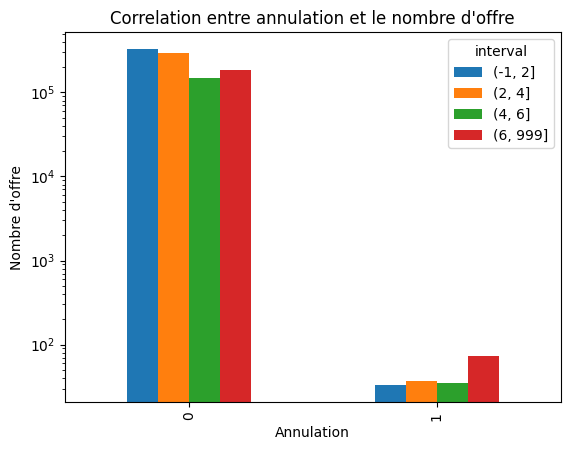

In [53]:
corr_cancelled_numberTenders_1(gb_1)

Nous pouvons constater que parmi les offres annulé, la majeur partie sont des offres qui concernent au maximum **2 lots**

Pour les offres non annulé, la majeur partie sont des offres qui concernent au minimum **2 lots**

## Coéfficient de corrélation

In [54]:
df_new = df.dropna()

In [55]:
df_new

,numberTenders,cancelled
3,11.0,0
4,6.0,0
8,5.0,0
9,2.0,0
10,4.0,0
...,...,...
1380960,2.0,0
1380961,2.0,0
1380962,3.0,0
1380963,1.0,0


In [56]:
binary_attribute = df_new['cancelled'].astype('category')
numeric_attribute= df_new['numberTenders'].astype(int)
corr_coeff, p_value = pointbiserialr(binary_attribute, numeric_attribute)

In [57]:
corr_coeff

0.006012417309949352

In [58]:
p_value

4.068999833246837e-09

# Correlation entre cancelled et lotsNumber	

## Graphe de corrélation

In [59]:
df = lots[['cancelled', 'lotsNumber']]

In [60]:
df

,cancelled,lotsNumber
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
...,...,...
1380960,0,NaN
1380961,0,NaN
1380962,0,NaN
1380963,0,NaN


In [61]:
df_new = df.dropna()

In [62]:
df_new

,cancelled,lotsNumber
284,0,1
300,0,1
319,0,1
320,0,2
321,0,3
...,...,...
1380952,0,3
1380953,0,4
1380954,0,5
1380955,0,6


## Coefficient de corrélation

In [63]:
# Cas d'étude

**Catégorielle vs Catégorielle**

- **Graphe corrélation**: bar plot
- **Coefficient de corrélation**: 
    - le coefficient de corrélation bisérial point (catégorielle binaire), 
    - le coefficient du chi-carré (indépendance), le coefficient de corrélation de Cramér
    
    
**Catégorielle vs Numérique**

- **Graphe corrélation**: violon plot
- **Coefficient de corrélation**: 
    - le coefficient de corrélation bisérial point (catégorielle binaire), 
    - le coefficient du chi-carré (indépendance), le coefficient de corrélation de Cramér
    
    
**Numérique vs Numérique**

- **Graphe corrélation**: scatter plot
- **Coefficient de corrélation**: 
    - le coefficient de corrélation corrélation de Pearson 

In [93]:
def plot_categorial_categorical(
    data,
    title,
    xlabel,
    ylabel,
    logy=True
):
    data.plot(kind='bar', stacked=False)
    # Adding titles and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if logy:
        plt.yscale('log')
    plt.show()

In [99]:
import seaborn as sns

In [108]:
def plot_categorial_numerical(
    data,
    title,
    xlabel,
    ylabel,
    logy=True
):
    sns.violinplot(data=data, x=xlabel, y=ylabel)
    # Adding titles and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if logy:
        plt.yscale('log')
    plt.show()

In [124]:
def plot_numerical_numerical(
    data,
    title,
    xlabel,
    ylabel,
    logy=True
):
    sns.scatterplot(data=data, x=xlabel, y=ylabel)
    # Adding titles and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if logy:
        plt.yscale('log')
    plt.show()

# Corrélation entre correctionsNb et cancelled	

In [64]:
## Graphe de corrélation

In [136]:
df = lots[['correctionsNb', 'cancelled']]

In [143]:
gb_1 = df.groupby(['correctionsNb','cancelled']).size().unstack(fill_value=0)

In [144]:
gb_1

cancelled,0,1
correctionsNb,,
0,1375507,279
1,5088,1
2,90,0


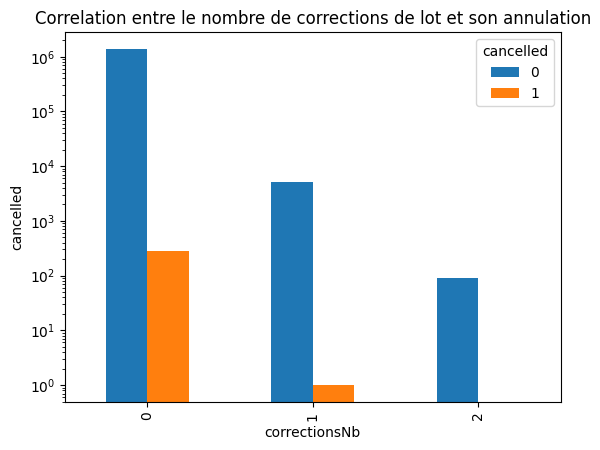

In [145]:
plot_categorial_categorical(
    data=gb_1,
    title="Correlation entre le nombre de corrections de lot et son annulation",
    xlabel="correctionsNb",
    ylabel="cancelled",
    logy=True
)

## Coefficient de corrélation

In [74]:
df_new = df.dropna()

In [76]:
df_new

,correctionsNb,cancelled
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1380960,0,0
1380961,0,0
1380962,0,0
1380963,0,0


In [77]:
binary_attribute = df_new['cancelled'].astype('category')
categorical_attribute= df_new['correctionsNb'].astype('category')
corr_coeff, p_value = pointbiserialr(binary_attribute, categorical_attribute)

In [78]:
corr_coeff

-5.542318591446514e-05

La valeur du **corr_coeff** etant proche de **0**, nous pouvons dire qu'il n'y a pas de correlation entre ces 2 variable

In [79]:
p_value

0.9480703249740478

Nous pouvons voir que **p_value** est supérieur à **0.5** donc il n'y a pas de correlation significative sur plan plan statistique

# Corrélation entre correctionsNb et awardDate

## Graphe de corrélation

In [148]:
df = lots[['correctionsNb', 'awardDate']]

In [149]:
df

,correctionsNb,awardDate
0,0,2009-09-24
1,0,2009-09-24
2,0,2009-09-24
3,0,2009-09-28
4,0,2009-11-06
...,...,...
1380960,0,2020-12-28
1380961,0,2020-12-10
1380962,0,2020-12-17
1380963,0,2020-12-11


In [254]:
def process_date(df):
    df = df.dropna()
    df['awardDate'] = pd.to_datetime(df['awardDate'])
    df['month'] = df['awardDate'].dt.month.astype(int)
    df['year'] = df['awardDate'].dt.year.astype(int)
    df['semester'] = pd.cut(
        df['month'],
        bins=[1, 6, 12],
        labels=['Semestre 1', 'Semestre 2'],
        include_lowest=True
    )
    df['quarter'] = pd.cut(
        df['month'],
        bins=[1, 3, 6, 9, 12],
        labels=['Trimestre 1', 'Trimestre 2', 'Trimestre 3', 'Trimestre 4'],
        include_lowest=True
    )
    return df

In [170]:
df=process_date(df)

,correctionsNb,awardDate,month,year,semester,quarter
0,0,2009-09-24,9,2009,Semestre 2,Trimestre 3
1,0,2009-09-24,9,2009,Semestre 2,Trimestre 3
2,0,2009-09-24,9,2009,Semestre 2,Trimestre 3
3,0,2009-09-28,9,2009,Semestre 2,Trimestre 3
4,0,2009-11-06,11,2009,Semestre 2,Trimestre 4
...,...,...,...,...,...,...
1380960,0,2020-12-28,12,2020,Semestre 2,Trimestre 4
1380961,0,2020-12-10,12,2020,Semestre 2,Trimestre 4
1380962,0,2020-12-17,12,2020,Semestre 2,Trimestre 4
1380963,0,2020-12-11,12,2020,Semestre 2,Trimestre 4


In [165]:
gb_1 = df.groupby(['correctionsNb','semester']).size().unstack(fill_value=0)

In [166]:
gb_1

semester,Semestre 1,Semestre 2
correctionsNb,,
0,549464,640516
1,2341,1904
2,17,52


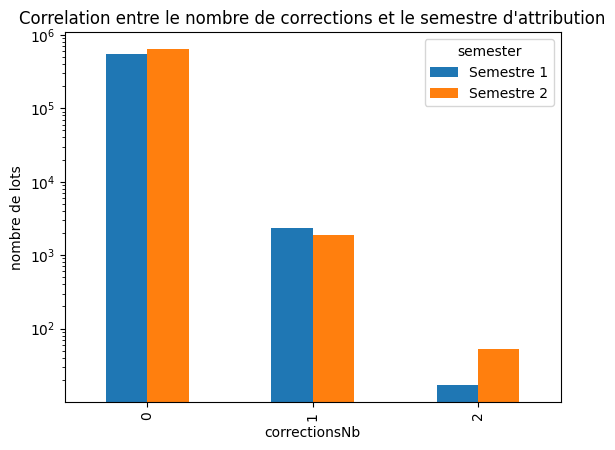

In [174]:
plot_categorial_categorical(
    data=gb_1,
    title="Correlation entre le nombre de corrections et le semestre d'attribution",
    xlabel="correctionsNb",
    ylabel="nombre de lots",
    logy=True
)

In [172]:
gb_2 = df.groupby(['correctionsNb','quarter']).size().unstack(fill_value=0)

In [173]:
gb_2

quarter,Trimestre 1,Trimestre 2,Trimestre 3,Trimestre 4
correctionsNb,,,,
0,281201,268263,254319,386197
1,1419,922,881,1023
2,7,10,46,6


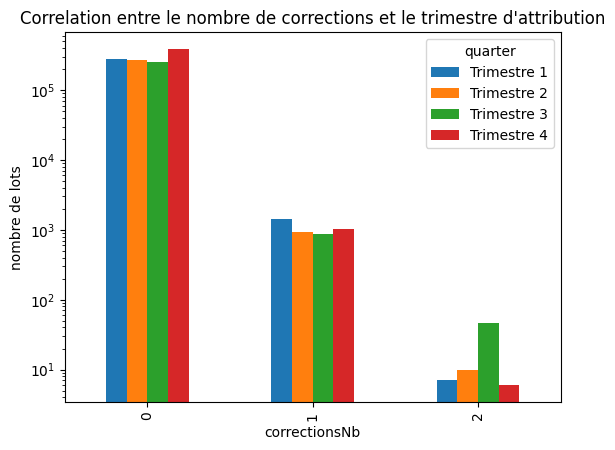

In [176]:
plot_categorial_categorical(
    data=gb_2,
    title="Correlation entre le nombre de corrections et le trimestre d'attribution",
    xlabel="correctionsNb",
    ylabel="nombre de lots",
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre correctionsNb et awardPrice

## Graphe de corrélation

In [177]:
df = lots[['correctionsNb', 'awardPrice']]

In [178]:
df

,correctionsNb,awardPrice
0,0,8.916747e+05
1,0,1.169251e+05
2,0,7.381412e+04
3,0,3.840584e+05
4,0,7.790000e+06
...,...,...
1380960,0,5.000000e+05
1380961,0,2.000000e+07
1380962,0,4.984029e+06
1380963,0,4.970000e+08


In [179]:
df = df.dropna()

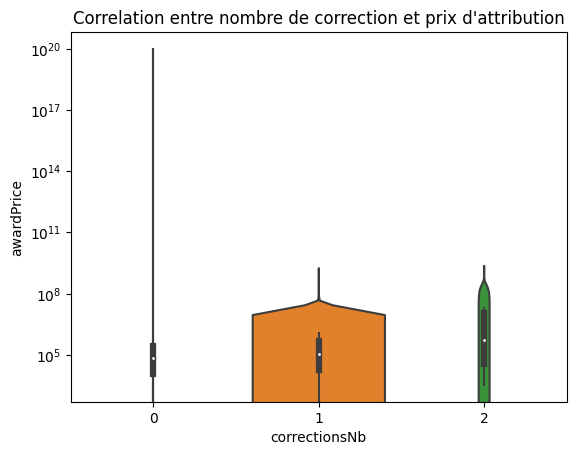

In [182]:
plot_categorial_numerical(
    data=df,
    title="Correlation entre nombre de correction et prix d'attribution",
    xlabel='correctionsNb',
    ylabel='awardPrice',
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre correctionsNb et numberTenders

## Graphe de corrélation

In [183]:
df = lots[['correctionsNb', 'numberTenders']]

In [184]:
df

,correctionsNb,numberTenders
0,0,NaN
1,0,NaN
2,0,NaN
3,0,11.0
4,0,6.0
...,...,...
1380960,0,2.0
1380961,0,2.0
1380962,0,3.0
1380963,0,1.0


In [185]:
df = df.dropna()

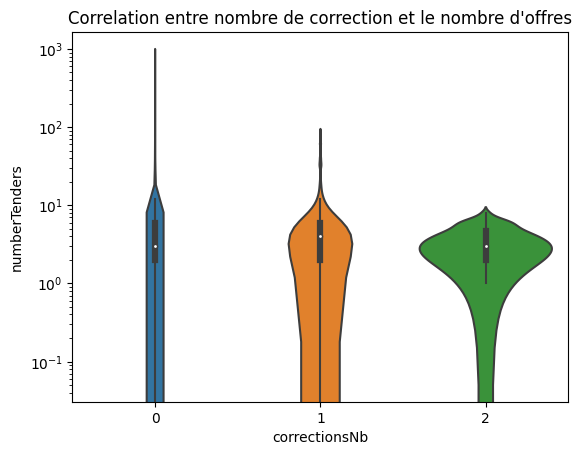

In [186]:
plot_categorial_numerical(
    data=df,
    title="Correlation entre nombre de correction et le nombre d'offres",
    xlabel='correctionsNb',
    ylabel='numberTenders',
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre correctionsNb et onBehalf

## Graphe de corrélation

In [187]:
df = lots[['correctionsNb', 'onBehalf']]

In [188]:
df

,correctionsNb,onBehalf
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
...,...,...
1380960,0,N
1380961,0,N
1380962,0,N
1380963,0,N


In [189]:
df = df.dropna()

In [191]:
gb_1 = df.groupby(['correctionsNb','onBehalf']).size().unstack(fill_value=0)

In [192]:
gb_1

onBehalf,N,Y
correctionsNb,,
0,1001488,92465
1,3218,1203
2,47,1


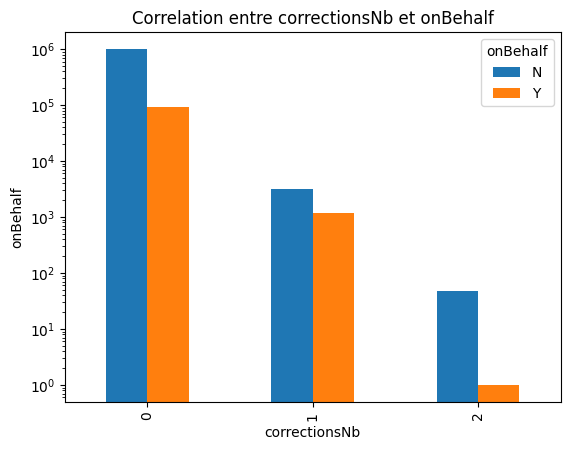

In [194]:
plot_categorial_categorical(
    data=gb_1,
    title="Correlation entre correctionsNb et onBehalf",
    xlabel="correctionsNb",
    ylabel="onBehalf",
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre correctionsNb et fraAgreement

## Graphe de corrélation

In [195]:
df = lots[['correctionsNb', 'fraAgreement']]

In [196]:
df

,correctionsNb,fraAgreement
0,0,N
1,0,N
2,0,N
3,0,N
4,0,Y
...,...,...
1380960,0,N
1380961,0,N
1380962,0,N
1380963,0,N


In [197]:
df = df.dropna()

In [198]:
gb_1 = df.groupby(['correctionsNb','fraAgreement']).size().unstack(fill_value=0)

In [199]:
gb_1

fraAgreement,N,Y
correctionsNb,,
0,895469,480317
1,3962,1127
2,72,18


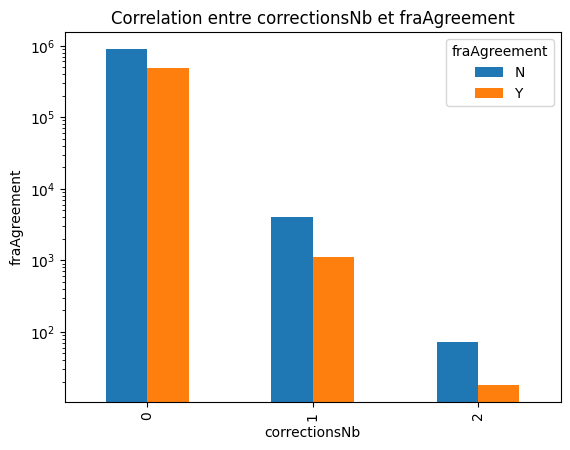

In [200]:
plot_categorial_categorical(
    data=gb_1,
    title="Correlation entre correctionsNb et fraAgreement",
    xlabel="correctionsNb",
    ylabel="fraAgreement",
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre correctionsNb et lotsNumber

## Graphe de corrélation

In [201]:
df = lots[['correctionsNb', 'lotsNumber']]

In [202]:
df

,correctionsNb,lotsNumber
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
...,...,...
1380960,0,NaN
1380961,0,NaN
1380962,0,NaN
1380963,0,NaN


On doit nettoyer lotsNumber

In [203]:
df = df.dropna()

In [205]:
set(df['lotsNumber'].value_counts().index)

{'16264',
 '63; 70; 90 ET 122',
 '2 - 4 - 6 - 8 - 10 - 12 - 14',
 '100099',
 '5919',
 '2-8',
 '292178',
 '568',
 '837',
 '9 -10  15',
 '3;5;6;8',
 '10.01.008.00.370.57.59',
 '180538',
 '270',
 '279280',
 '19GP17',
 '3; 7; 11; 12; 17; 21; 22; 24; 25',
 '9FC175C0',
 '7-14-31-39-44-45-46-49-50-57-58-62-66-70-77-84',
 '1823-13',
 '1 (CATEGORIE 3)',
 '131-171-292-299-',
 '6GP17',
 '15 ET 17',
 '52/81/85/87/88/89/98/223/227/246/267/268/269',
 '06D',
 'I161RM15',
 '638',
 '12  07',
 '962',
 '180109',
 '1; 2; 3; 7; 8',
 '20.01',
 '46-47',
 '140 177 178',
 '6/19/',
 '2360',
 '320; 340; 347',
 '201011',
 '180265',
 '8-29',
 '180797',
 '34;121',
 '16S00074',
 '190161',
 '37.1-2;90.1;151.1;314.1-2;475.1-2;475.4-5',
 '676',
 '1&5',
 '546-555-556-557-',
 '10-15-28-56',
 '100342',
 '380;383;388',
 '304953',
 '100329',
 '190162',
 '1  TITULAIRE 2',
 '91; 94; 95; 96; 107; 215; 217; 218; 219; 276',
 '1000851',
 '5-14-21-35-36-39-45-54',
 'AM OUEST',
 '2020-19-05',
 '185',
 '79;83',
 '20101093',
 '550',


## Coéfficient de corrélation

# Corrélation entre correctionsNb et outOfDirectives

## Graphe de corrélation

In [206]:
df = lots[['correctionsNb', 'outOfDirectives']]

In [207]:
df

,correctionsNb,outOfDirectives
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1380960,0,0
1380961,0,0
1380962,0,0
1380963,0,0


In [210]:
df = df.dropna()

In [211]:
gb_1 = df.groupby(['correctionsNb','outOfDirectives']).size().unstack(fill_value=0)

In [212]:
gb_1

outOfDirectives,0,1
correctionsNb,,
0,1320396,55390
1,4968,121
2,90,0


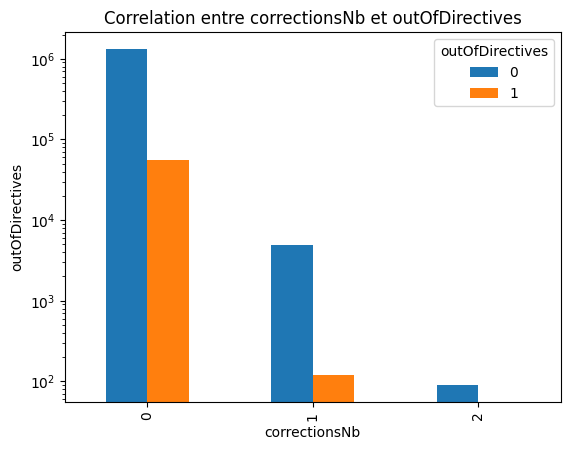

In [213]:
plot_categorial_categorical(
    data=gb_1,
    title="Correlation entre correctionsNb et outOfDirectives",
    xlabel="correctionsNb",
    ylabel="outOfDirectives",
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre correctionsNb et subContracted

## Graphe de corrélation

In [214]:
df = lots[['correctionsNb', 'subContracted']]

In [215]:
df

,correctionsNb,subContracted
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,N
...,...,...
1380960,0,NaN
1380961,0,NaN
1380962,0,NaN
1380963,0,NaN


In [216]:
df = df.dropna()

In [217]:
gb_1 = df.groupby(['correctionsNb','subContracted']).size().unstack(fill_value=0)

In [218]:
gb_1

subContracted,N,Y
correctionsNb,,
0,595963,101603
1,1678,419
2,51,6


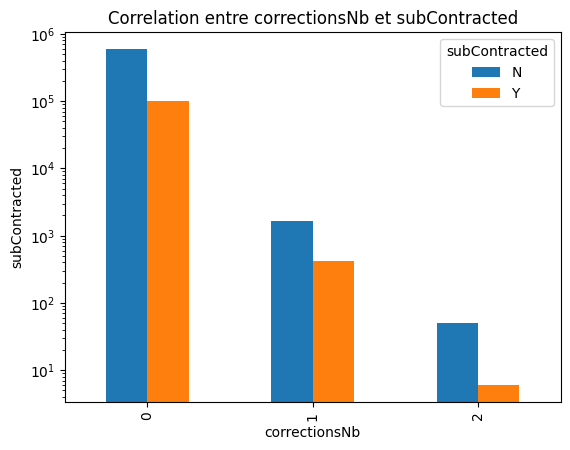

In [219]:
plot_categorial_categorical(
    data=gb_1,
    title="Correlation entre correctionsNb et subContracted",
    xlabel="correctionsNb",
    ylabel="subContracted",
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre correctionsNb et gpa

## Graphe de corrélation

In [220]:
df = lots[['correctionsNb', 'gpa']]

In [221]:
df

,correctionsNb,gpa
0,0,Y
1,0,Y
2,0,Y
3,0,N
4,0,N
...,...,...
1380960,0,NaN
1380961,0,NaN
1380962,0,NaN
1380963,0,NaN


In [222]:
df = df.dropna()

In [223]:
gb_1 = df.groupby(['correctionsNb','gpa']).size().unstack(fill_value=0)

In [225]:
gb_1

gpa,N,Y
correctionsNb,,
0,166795,914693
1,638,3429
2,2,69


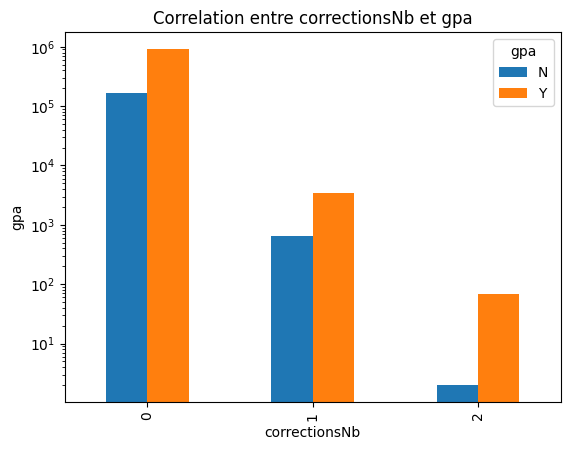

In [224]:
plot_categorial_categorical(
    data=gb_1,
    title="Correlation entre correctionsNb et gpa",
    xlabel="correctionsNb",
    ylabel="gpa",
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre correctionsNb et typeOfContract

## Graphe de corrélation

In [226]:
df = lots[['correctionsNb', 'typeOfContract']]

In [227]:
df

,correctionsNb,typeOfContract
0,0,W
1,0,W
2,0,W
3,0,W
4,0,W
...,...,...
1380960,0,S
1380961,0,S
1380962,0,S
1380963,0,S


In [228]:
df = df.dropna()

In [229]:
gb_1 = df.groupby(['correctionsNb','typeOfContract']).size().unstack(fill_value=0)

In [230]:
gb_1

typeOfContract,S,U,W
correctionsNb,,,
0,548286,552428,275072
1,1724,2184,1181
2,45,26,19


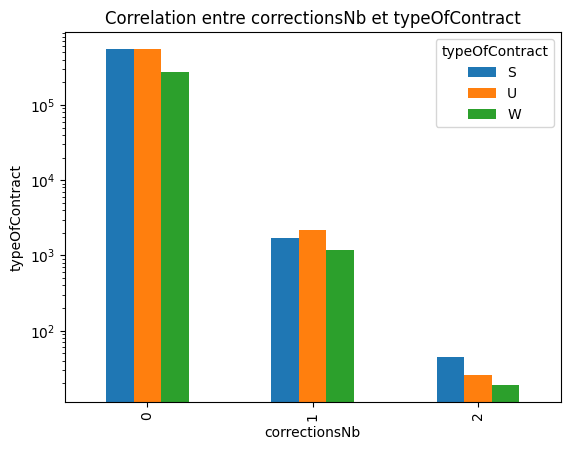

In [231]:
plot_categorial_categorical(
    data=gb_1,
    title="Correlation entre correctionsNb et typeOfContract",
    xlabel="correctionsNb",
    ylabel="typeOfContract",
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre correctionsNb et topType

## Graphe de corrélation

In [232]:
df = lots[['correctionsNb', 'topType']]

In [233]:
df

,correctionsNb,topType
0,0,OPE
1,0,OPE
2,0,OPE
3,0,OPE
4,0,RES
...,...,...
1380960,0,NIC
1380961,0,NIC
1380962,0,NIC
1380963,0,NOC


In [234]:
df = df.dropna()

In [235]:
gb_1 = df.groupby(['correctionsNb','topType']).size().unstack(fill_value=0)

In [236]:
gb_1

topType,AWP,COD,INP,NIC,NIP,NOC,NOP,OPE,RES
correctionsNb,,,,,,,,,
0,64866,2761,33,103475,1213,17697,506,1161044,24011
1,211,33,0,344,12,39,0,4298,141
2,0,5,0,29,2,0,0,54,0


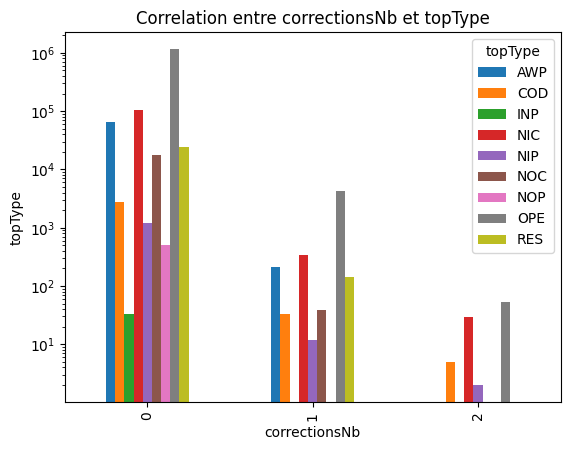

In [237]:
plot_categorial_categorical(
    data=gb_1,
    title="Correlation entre correctionsNb et topType",
    xlabel="correctionsNb",
    ylabel="topType",
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre correctionsNb et renewal

## Graphe de corrélation

In [238]:
df = lots[['correctionsNb', 'renewal']]

In [239]:
df

,correctionsNb,renewal
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
...,...,...
1380960,0,NaN
1380961,0,NaN
1380962,0,NaN
1380963,0,NaN


In [240]:
df = df.dropna()

In [241]:
gb_1 = df.groupby(['correctionsNb','renewal']).size().unstack(fill_value=0)

In [242]:
gb_1

renewal,N,Y
correctionsNb,,
0,230904,482623
1,976,2565
2,44,16


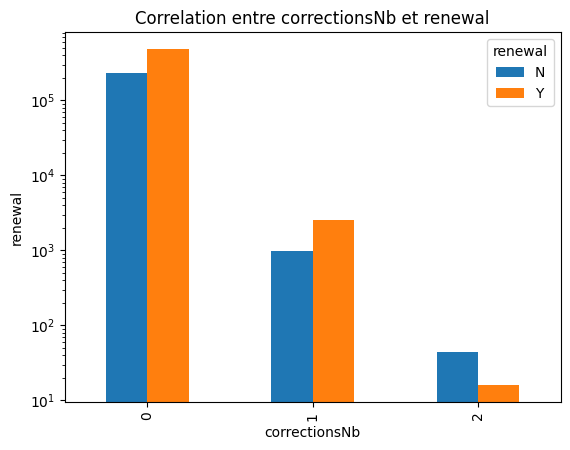

In [243]:
plot_categorial_categorical(
    data=gb_1,
    title="Correlation entre correctionsNb et renewal",
    xlabel="correctionsNb",
    ylabel="renewal",
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre correctionsNb et contractDuration

## Graphe de corrélation

In [244]:
df = lots[['correctionsNb', 'contractDuration']]

In [245]:
df

,correctionsNb,contractDuration
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,24.01
...,...,...
1380960,0,96.00
1380961,0,NaN
1380962,0,60.00
1380963,0,NaN


In [247]:
df = df.dropna()

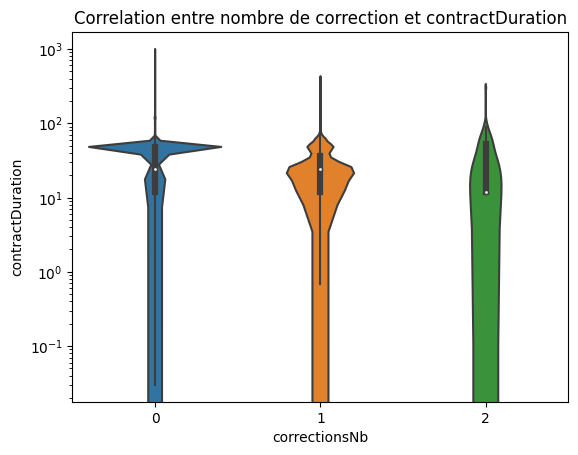

In [248]:
plot_categorial_numerical(
    data=df,
    title="Correlation entre nombre de correction et contractDuration",
    xlabel='correctionsNb',
    ylabel='contractDuration',
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre correctionsNb et publicityDuration

## Graphe de corrélation

In [249]:
df = lots[['correctionsNb', 'publicityDuration']]

In [250]:
df

,correctionsNb,publicityDuration
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,36.0
...,...,...
1380960,0,35.0
1380961,0,62.0
1380962,0,35.0
1380963,0,NaN


In [251]:
df = df.dropna()

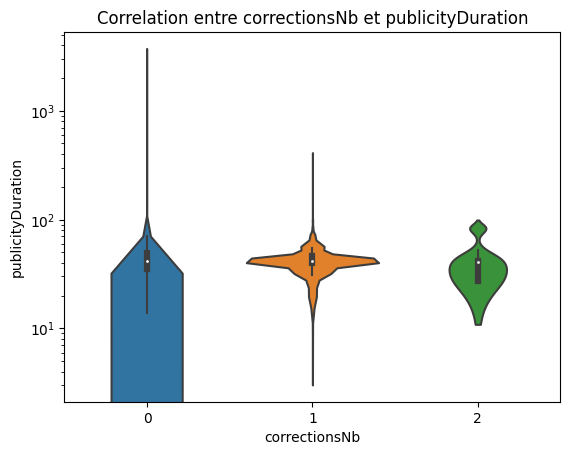

In [253]:
plot_categorial_numerical(
    data=df,
    title="Correlation entre correctionsNb et publicityDuration",
    xlabel='correctionsNb',
    ylabel='publicityDuration',
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre cancelled et awardDate

## Graphe de corrélation

In [255]:
df = lots[['cancelled', 'awardDate']]

In [256]:
df

,cancelled,awardDate
0,0,2009-09-24
1,0,2009-09-24
2,0,2009-09-24
3,0,2009-09-28
4,0,2009-11-06
...,...,...
1380960,0,2020-12-28
1380961,0,2020-12-10
1380962,0,2020-12-17
1380963,0,2020-12-11


In [257]:
df=process_date(df)

In [258]:
df

,cancelled,awardDate,month,year,semester,quarter
0,0,2009-09-24,9,2009,Semestre 2,Trimestre 3
1,0,2009-09-24,9,2009,Semestre 2,Trimestre 3
2,0,2009-09-24,9,2009,Semestre 2,Trimestre 3
3,0,2009-09-28,9,2009,Semestre 2,Trimestre 3
4,0,2009-11-06,11,2009,Semestre 2,Trimestre 4
...,...,...,...,...,...,...
1380960,0,2020-12-28,12,2020,Semestre 2,Trimestre 4
1380961,0,2020-12-10,12,2020,Semestre 2,Trimestre 4
1380962,0,2020-12-17,12,2020,Semestre 2,Trimestre 4
1380963,0,2020-12-11,12,2020,Semestre 2,Trimestre 4


In [260]:
gb_1 = df.groupby(['cancelled','semester']).size().unstack(fill_value=0)

In [261]:
gb_1

semester,Semestre 1,Semestre 2
cancelled,,
0,551721,642357
1,101,115


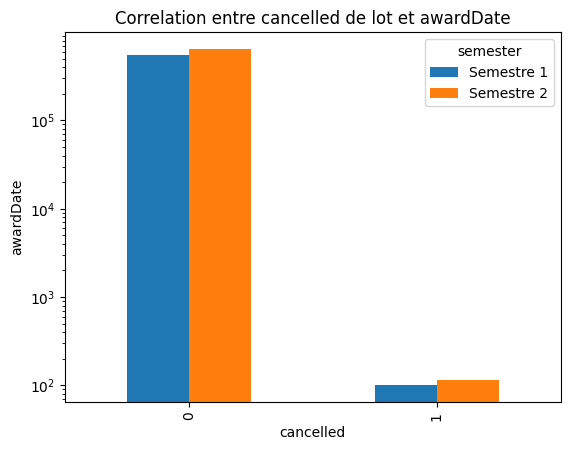

In [263]:
plot_categorial_categorical(
    data=gb_1,
    title="Correlation entre cancelled de lot et awardDate",
    xlabel="cancelled",
    ylabel="awardDate",
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre cancelled et awardPrice

## Graphe de corrélation

In [264]:
df = lots[['cancelled', 'awardPrice']]

In [265]:
df

,cancelled,awardPrice
0,0,8.916747e+05
1,0,1.169251e+05
2,0,7.381412e+04
3,0,3.840584e+05
4,0,7.790000e+06
...,...,...
1380960,0,5.000000e+05
1380961,0,2.000000e+07
1380962,0,4.984029e+06
1380963,0,4.970000e+08


In [266]:
df = df.dropna()

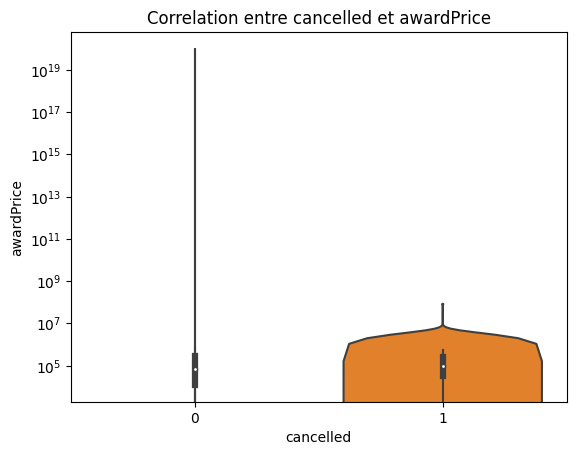

In [267]:
plot_categorial_numerical(
    data=df,
    title="Correlation entre cancelled et awardPrice",
    xlabel='cancelled',
    ylabel='awardPrice',
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre cancelled et numberTenders

## Graphe de corrélation

In [268]:
df = lots[['cancelled', 'numberTenders']]

In [269]:
df

,cancelled,numberTenders
0,0,NaN
1,0,NaN
2,0,NaN
3,0,11.0
4,0,6.0
...,...,...
1380960,0,2.0
1380961,0,2.0
1380962,0,3.0
1380963,0,1.0


In [270]:
df = df.dropna()

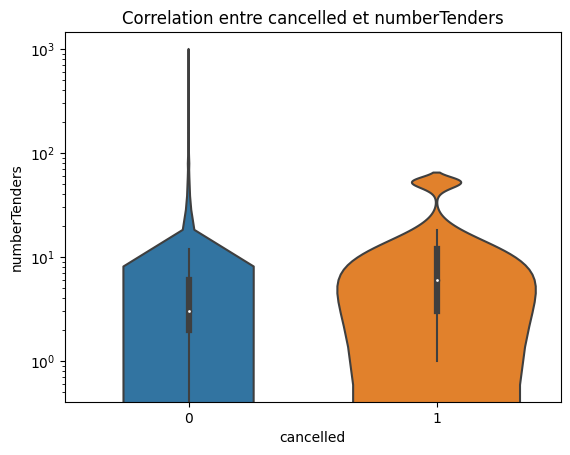

In [271]:
plot_categorial_numerical(
    data=df,
    title="Correlation entre cancelled et numberTenders",
    xlabel='cancelled',
    ylabel='numberTenders',
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre cancelled et onBehalf

## Graphe de corrélation

In [272]:
df = lots[['cancelled', 'onBehalf']]

In [273]:
df

,cancelled,onBehalf
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
...,...,...
1380960,0,N
1380961,0,N
1380962,0,N
1380963,0,N


In [274]:
df = df.dropna()

In [275]:
gb_1 = df.groupby(['cancelled','onBehalf']).size().unstack(fill_value=0)

In [276]:
gb_1

onBehalf,N,Y
cancelled,,
0,1004593,93642
1,160,27


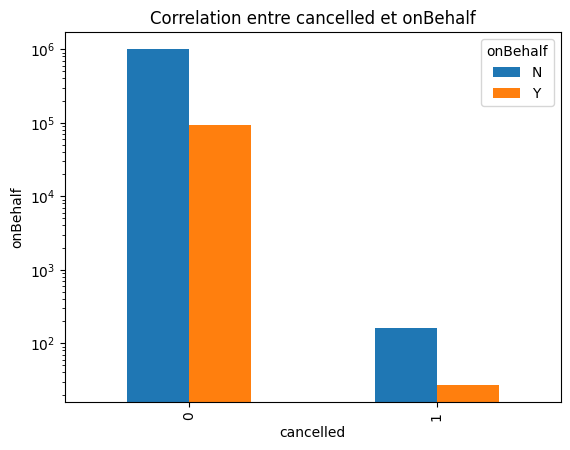

In [277]:
plot_categorial_categorical(
    data=gb_1,
    title="Correlation entre cancelled et onBehalf",
    xlabel="cancelled",
    ylabel="onBehalf",
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre cancelled et fraAgreement

## Graphe de corrélation

In [278]:
df = lots[['cancelled', 'fraAgreement']]

In [279]:
df

,cancelled,fraAgreement
0,0,N
1,0,N
2,0,N
3,0,N
4,0,Y
...,...,...
1380960,0,N
1380961,0,N
1380962,0,N
1380963,0,N


In [280]:
df = df.dropna()

In [281]:
gb_1 = df.groupby(['cancelled','fraAgreement']).size().unstack(fill_value=0)

In [282]:
gb_1

fraAgreement,N,Y
cancelled,,
0,899308,481377
1,195,85


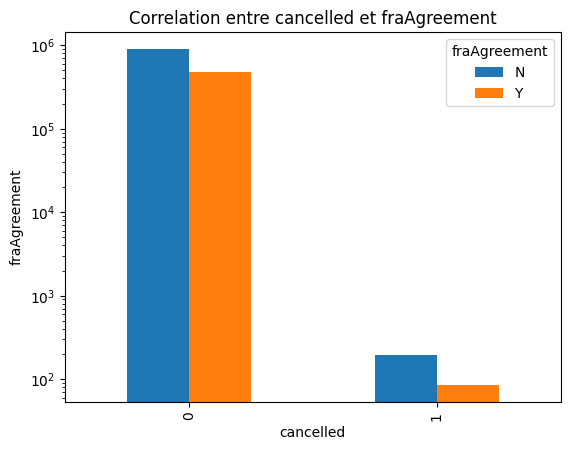

In [283]:
plot_categorial_categorical(
    data=gb_1,
    title="Correlation entre cancelled et fraAgreement",
    xlabel="cancelled",
    ylabel="fraAgreement",
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre cancelled et lotsNumber

## Graphe de corrélation

Nettoyage de lotsNumber

## Coéfficient de corrélation

# Corrélation entre cancelled et outOfDirectives

## Graphe de corrélation

In [284]:
df = lots[['cancelled', 'outOfDirectives']]

In [285]:
df

,cancelled,outOfDirectives
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1380960,0,0
1380961,0,0
1380962,0,0
1380963,0,0


In [286]:
df = df.dropna()

In [287]:
gb_1 = df.groupby(['cancelled','outOfDirectives']).size().unstack(fill_value=0)

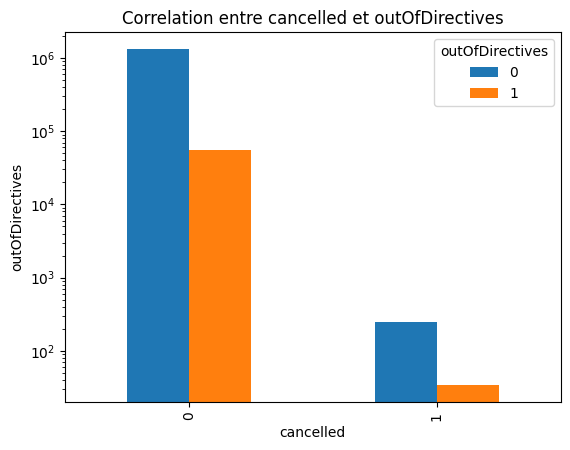

In [288]:
plot_categorial_categorical(
    data=gb_1,
    title="Correlation entre cancelled et outOfDirectives",
    xlabel="cancelled",
    ylabel="outOfDirectives",
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre cancelled et subContracted

## Graphe de corrélation

In [289]:
df = lots[['cancelled', 'subContracted']]

In [290]:
df

,cancelled,subContracted
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,N
...,...,...
1380960,0,NaN
1380961,0,NaN
1380962,0,NaN
1380963,0,NaN


In [291]:
df = df.dropna()

In [292]:
gb_1 = df.groupby(['cancelled','subContracted']).size().unstack(fill_value=0)

In [293]:
gb_1

subContracted,N,Y
cancelled,,
0,597583,102017
1,109,11


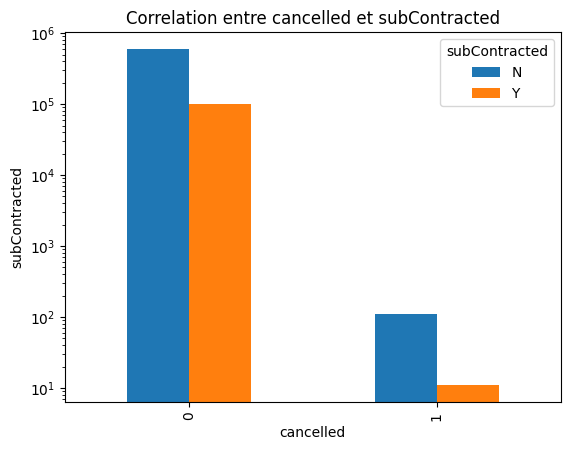

In [294]:
plot_categorial_categorical(
    data=gb_1,
    title="Correlation entre cancelled et subContracted",
    xlabel="cancelled",
    ylabel="subContracted",
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre cancelled et gpa

## Graphe de corrélation

In [295]:
df = lots[['cancelled', 'gpa']]

In [296]:
df

,cancelled,gpa
0,0,Y
1,0,Y
2,0,Y
3,0,N
4,0,N
...,...,...
1380960,0,NaN
1380961,0,NaN
1380962,0,NaN
1380963,0,NaN


In [297]:
df = df.dropna()

In [298]:
gb_1 = df.groupby(['cancelled','gpa']).size().unstack(fill_value=0)

In [299]:
gb_1

gpa,N,Y
cancelled,,
0,167422,918061
1,13,130


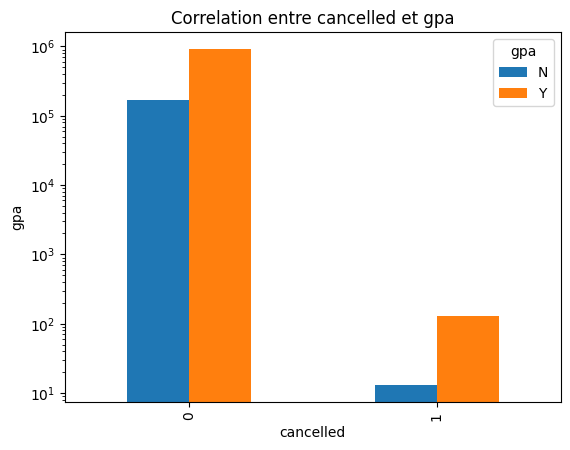

In [300]:
plot_categorial_categorical(
    data=gb_1,
    title="Correlation entre cancelled et gpa",
    xlabel="cancelled",
    ylabel="gpa",
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre cancelled et typeOfContract

## Graphe de corrélation

In [301]:
df = lots[['cancelled', 'typeOfContract']]

In [302]:
df

,cancelled,typeOfContract
0,0,W
1,0,W
2,0,W
3,0,W
4,0,W
...,...,...
1380960,0,S
1380961,0,S
1380962,0,S
1380963,0,S


In [303]:
df = df.dropna()

In [304]:
gb_1 = df.groupby(['cancelled','typeOfContract']).size().unstack(fill_value=0)

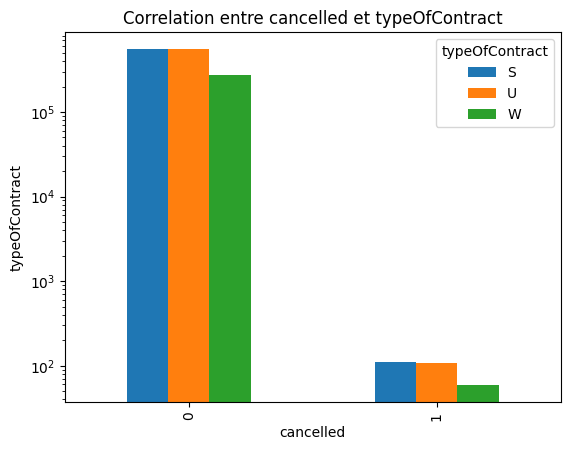

In [305]:
plot_categorial_categorical(
    data=gb_1,
    title="Correlation entre cancelled et typeOfContract",
    xlabel="cancelled",
    ylabel="typeOfContract",
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre cancelled et topType

## Graphe de corrélation

In [306]:
df = lots[['cancelled', 'topType']]

In [307]:
df

,cancelled,topType
0,0,OPE
1,0,OPE
2,0,OPE
3,0,OPE
4,0,RES
...,...,...
1380960,0,NIC
1380961,0,NIC
1380962,0,NIC
1380963,0,NOC


In [308]:
df = df.dropna()

In [309]:
gb_1 = df.groupby(['cancelled','topType']).size().unstack(fill_value=0)

In [310]:
gb_1

topType,AWP,COD,INP,NIC,NIP,NOC,NOP,OPE,RES
cancelled,,,,,,,,,
0,65049,2799,33,103820,1227,17720,506,1165199,24141
1,28,0,0,28,0,16,0,197,11


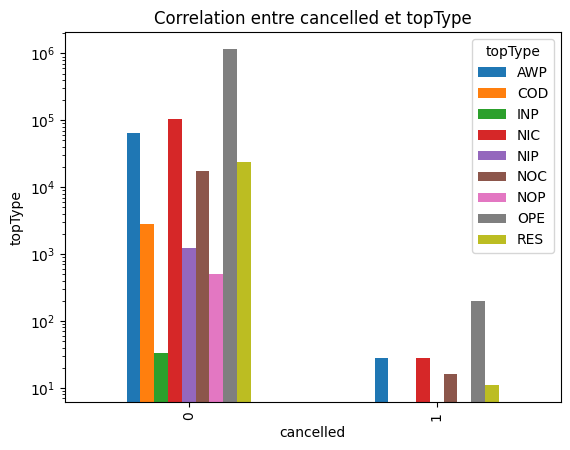

In [311]:
plot_categorial_categorical(
    data=gb_1,
    title="Correlation entre cancelled et topType",
    xlabel="cancelled",
    ylabel="topType",
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre cancelled et renewal

## Graphe de corrélation

In [312]:
df = lots[['cancelled', 'renewal']]

In [315]:
df

,cancelled,renewal
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
...,...,...
1380960,0,NaN
1380961,0,NaN
1380962,0,NaN
1380963,0,NaN


In [316]:
df = df.dropna()

In [317]:
gb_1 = df.groupby(['cancelled','renewal']).size().unstack(fill_value=0)

In [318]:
gb_1

renewal,N,Y
cancelled,,
0,231916,485144
1,8,60


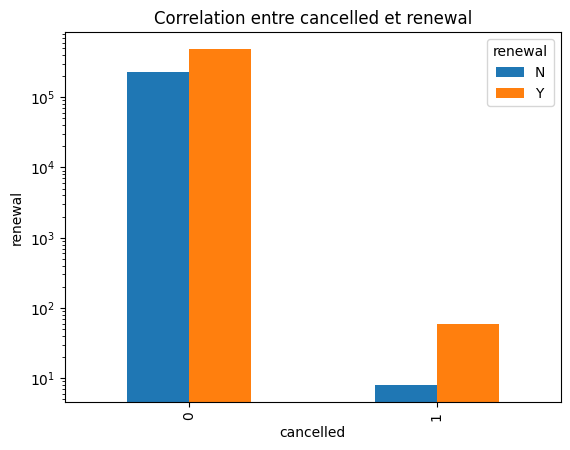

In [319]:
plot_categorial_categorical(
    data=gb_1,
    title="Correlation entre cancelled et renewal",
    xlabel="cancelled",
    ylabel="renewal",
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre cancelled et contractDuration

## Graphe de corrélation

In [320]:
df = lots[['cancelled', 'contractDuration']]

In [321]:
df

,cancelled,contractDuration
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,24.01
...,...,...
1380960,0,96.00
1380961,0,NaN
1380962,0,60.00
1380963,0,NaN


In [322]:
df = df.dropna()

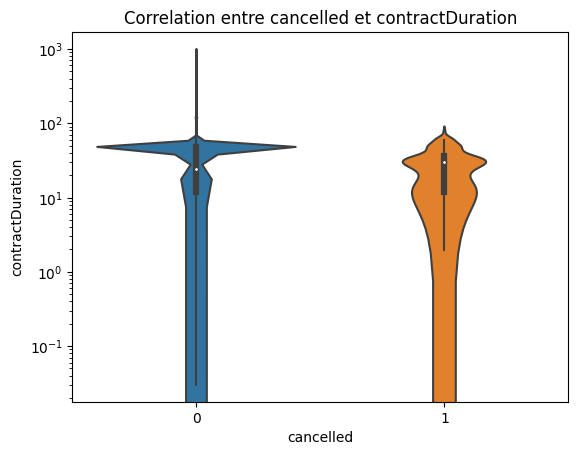

In [323]:
plot_categorial_numerical(
    data=df,
    title="Correlation entre cancelled et contractDuration",
    xlabel='cancelled',
    ylabel='contractDuration',
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre cancelled et publicityDuration

## Graphe de corrélation

In [324]:
df = lots[['cancelled', 'publicityDuration']]

In [325]:
df

,cancelled,publicityDuration
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,36.0
...,...,...
1380960,0,35.0
1380961,0,62.0
1380962,0,35.0
1380963,0,NaN


In [326]:
df = df.dropna()

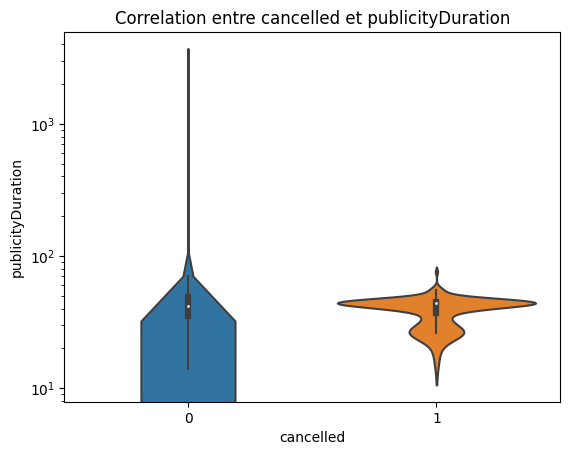

In [329]:
plot_categorial_numerical(
    data=df,
    title="Correlation entre cancelled et publicityDuration",
    xlabel='cancelled',
    ylabel='publicityDuration',
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre awardDate et awardPrice

## Graphe de corrélation

In [330]:
df = lots[['awardDate', 'awardPrice']]

In [331]:
df

,awardDate,awardPrice
0,2009-09-24,8.916747e+05
1,2009-09-24,1.169251e+05
2,2009-09-24,7.381412e+04
3,2009-09-28,3.840584e+05
4,2009-11-06,7.790000e+06
...,...,...
1380960,2020-12-28,5.000000e+05
1380961,2020-12-10,2.000000e+07
1380962,2020-12-17,4.984029e+06
1380963,2020-12-11,4.970000e+08


In [332]:
df = process_date(df)

In [333]:
df

,awardDate,awardPrice,month,year,semester,quarter
0,2009-09-24,8.916747e+05,9,2009,Semestre 2,Trimestre 3
1,2009-09-24,1.169251e+05,9,2009,Semestre 2,Trimestre 3
2,2009-09-24,7.381412e+04,9,2009,Semestre 2,Trimestre 3
3,2009-09-28,3.840584e+05,9,2009,Semestre 2,Trimestre 3
4,2009-11-06,7.790000e+06,11,2009,Semestre 2,Trimestre 4
...,...,...,...,...,...,...
1380960,2020-12-28,5.000000e+05,12,2020,Semestre 2,Trimestre 4
1380961,2020-12-10,2.000000e+07,12,2020,Semestre 2,Trimestre 4
1380962,2020-12-17,4.984029e+06,12,2020,Semestre 2,Trimestre 4
1380963,2020-12-11,4.970000e+08,12,2020,Semestre 2,Trimestre 4


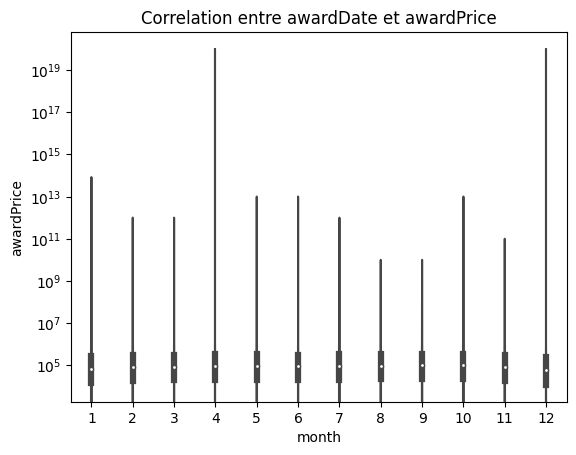

In [341]:
plot_categorial_numerical(
    data=df,
    title="Correlation entre awardDate et awardPrice",
    xlabel='month',
    ylabel='awardPrice',
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre awardDate et numberTenders

## Graphe de corrélation

In [342]:
df = lots[['awardDate', 'numberTenders']]

In [343]:
df

,awardDate,numberTenders
0,2009-09-24,NaN
1,2009-09-24,NaN
2,2009-09-24,NaN
3,2009-09-28,11.0
4,2009-11-06,6.0
...,...,...
1380960,2020-12-28,2.0
1380961,2020-12-10,2.0
1380962,2020-12-17,3.0
1380963,2020-12-11,1.0


In [344]:
df = process_date(df)

In [345]:
df

,awardDate,numberTenders,month,year,semester,quarter
3,2009-09-28,11.0,9,2009,Semestre 2,Trimestre 3
4,2009-11-06,6.0,11,2009,Semestre 2,Trimestre 4
8,2009-10-15,5.0,10,2009,Semestre 2,Trimestre 4
9,2009-10-15,2.0,10,2009,Semestre 2,Trimestre 4
10,2009-10-15,4.0,10,2009,Semestre 2,Trimestre 4
...,...,...,...,...,...,...
1380960,2020-12-28,2.0,12,2020,Semestre 2,Trimestre 4
1380961,2020-12-10,2.0,12,2020,Semestre 2,Trimestre 4
1380962,2020-12-17,3.0,12,2020,Semestre 2,Trimestre 4
1380963,2020-12-11,1.0,12,2020,Semestre 2,Trimestre 4


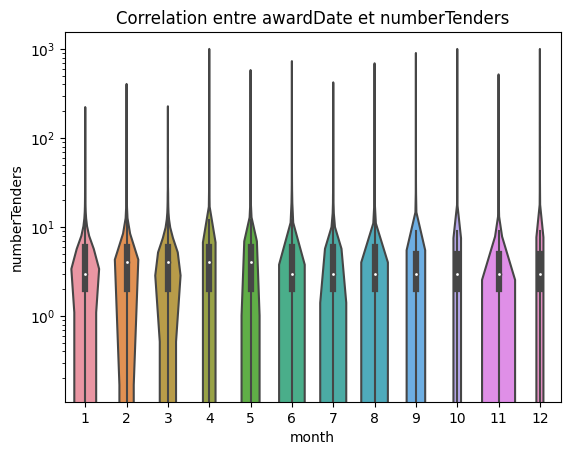

In [346]:
plot_categorial_numerical(
    data=df,
    title="Correlation entre awardDate et numberTenders",
    xlabel='month',
    ylabel='numberTenders',
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre awardDate et onBehalf

## Graphe de corrélation

In [351]:
df = lots[['awardDate', 'onBehalf']]

In [352]:
df

,awardDate,onBehalf
0,2009-09-24,NaN
1,2009-09-24,NaN
2,2009-09-24,NaN
3,2009-09-28,NaN
4,2009-11-06,NaN
...,...,...
1380960,2020-12-28,N
1380961,2020-12-10,N
1380962,2020-12-17,N
1380963,2020-12-11,N


In [353]:
df = process_date(df)

In [356]:
gb_1 = df.groupby(['month','onBehalf']).size().unstack(fill_value=0)

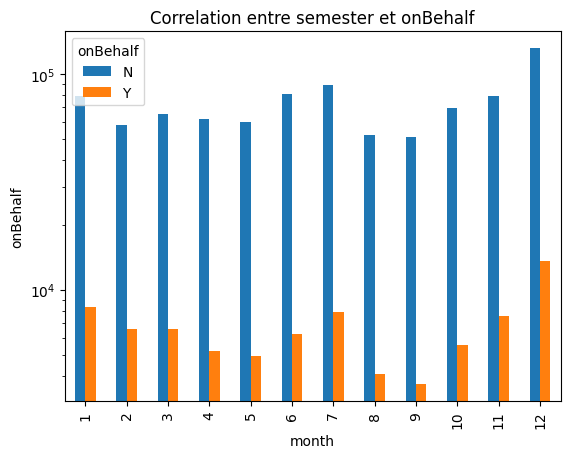

In [357]:
plot_categorial_categorical(
    data=gb_1,
    title="Correlation entre semester et onBehalf",
    xlabel="month",
    ylabel="onBehalf",
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre awardDate et fraAgreement

## Graphe de corrélation

In [358]:
df = lots[['awardDate', 'fraAgreement']]

In [359]:
df

,awardDate,fraAgreement
0,2009-09-24,N
1,2009-09-24,N
2,2009-09-24,N
3,2009-09-28,N
4,2009-11-06,Y
...,...,...
1380960,2020-12-28,N
1380961,2020-12-10,N
1380962,2020-12-17,N
1380963,2020-12-11,N


In [360]:
df = process_date(df)

In [361]:
gb_1 = df.groupby(['month','fraAgreement']).size().unstack(fill_value=0)

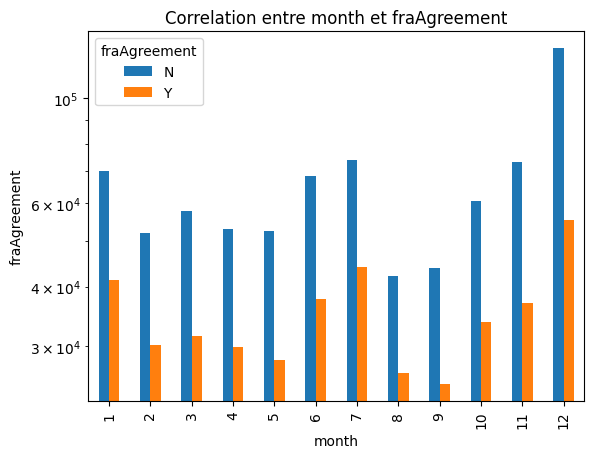

In [362]:
plot_categorial_categorical(
    data=gb_1,
    title="Correlation entre month et fraAgreement",
    xlabel="month",
    ylabel="fraAgreement",
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre awardDate et lotsNumber

## Graphe de corrélation

In [363]:
df = lots[['awardDate', 'lotsNumber']]

In [364]:
df

,awardDate,lotsNumber
0,2009-09-24,NaN
1,2009-09-24,NaN
2,2009-09-24,NaN
3,2009-09-28,NaN
4,2009-11-06,NaN
...,...,...
1380960,2020-12-28,NaN
1380961,2020-12-10,NaN
1380962,2020-12-17,NaN
1380963,2020-12-11,NaN


In [365]:
df = df.dropna()

Nettoyer lotsNumber

## Coéfficient de corrélation

# Corrélation entre awardDate et outOfDirectives

## Graphe de corrélation

In [367]:
df = lots[['awardDate', 'outOfDirectives']]

In [368]:
df

,awardDate,outOfDirectives
0,2009-09-24,0
1,2009-09-24,0
2,2009-09-24,0
3,2009-09-28,0
4,2009-11-06,0
...,...,...
1380960,2020-12-28,0
1380961,2020-12-10,0
1380962,2020-12-17,0
1380963,2020-12-11,0


In [369]:
df = process_date(df)

In [370]:
gb_1 = df.groupby(['month', 'outOfDirectives']).size().unstack(fill_value=0)

In [371]:
gb_1

outOfDirectives,0,1
month,,
1,107811,3639
2,78724,3391
3,84961,4101
4,78655,4065
5,75897,4452
6,100340,5786
7,112081,6021
8,65191,3268
9,64827,3858


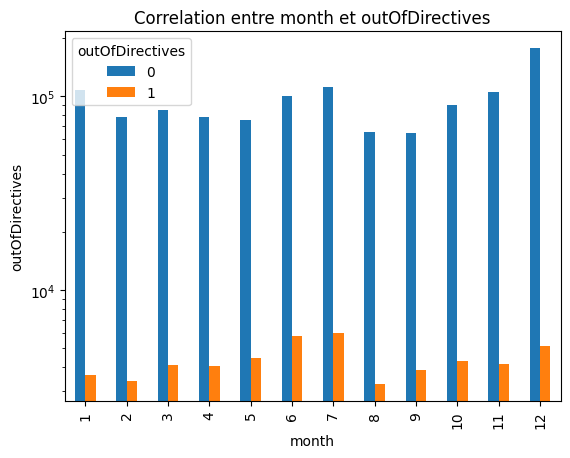

In [372]:
plot_categorial_categorical(
    data=gb_1,
    title="Correlation entre month et outOfDirectives",
    xlabel="month",
    ylabel="outOfDirectives",
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre awardDate et subContracted

## Graphe de corrélation

In [373]:
df = lots[['awardDate', 'subContracted']]

In [374]:
df

,awardDate,subContracted
0,2009-09-24,NaN
1,2009-09-24,NaN
2,2009-09-24,NaN
3,2009-09-28,NaN
4,2009-11-06,N
...,...,...
1380960,2020-12-28,NaN
1380961,2020-12-10,NaN
1380962,2020-12-17,NaN
1380963,2020-12-11,NaN


In [375]:
df = process_date(df)

In [376]:
gb_1 = df.groupby(['month','subContracted']).size().unstack(fill_value=0)

In [377]:
gb_1

subContracted,N,Y
month,,
1,52692,8132
2,38783,6620
3,43329,7587
4,41574,7268
5,40221,6729
6,52429,10044
7,59976,11348
8,35253,6611
9,33913,6669


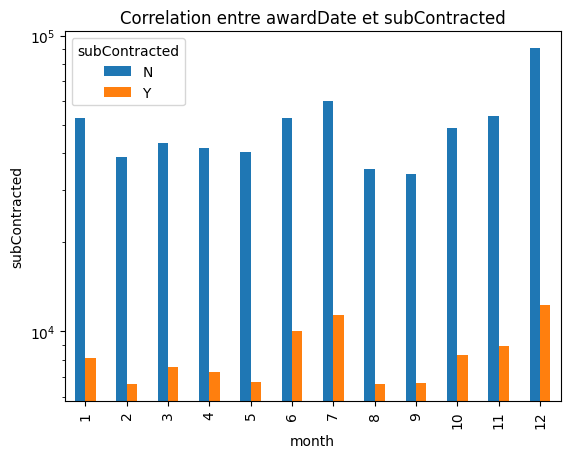

In [379]:
plot_categorial_categorical(
    data=gb_1,
    title="Correlation entre awardDate et subContracted",
    xlabel="month",
    ylabel="subContracted",
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre awardDate et gpa

## Graphe de corrélation

In [380]:
df = lots[['awardDate', 'gpa']]

In [381]:
df

,awardDate,gpa
0,2009-09-24,Y
1,2009-09-24,Y
2,2009-09-24,Y
3,2009-09-28,N
4,2009-11-06,N
...,...,...
1380960,2020-12-28,NaN
1380961,2020-12-10,NaN
1380962,2020-12-17,NaN
1380963,2020-12-11,NaN


In [382]:
df = process_date(df)

In [383]:
gb_1 = df.groupby(['month','gpa']).size().unstack(fill_value=0)

In [384]:
gb_1

gpa,N,Y
month,,
1,12210,74877
2,9993,54754
3,10734,60422
4,10166,56129
5,10332,53287
6,13890,70805
7,15550,80854
8,8670,47070
9,9127,45580


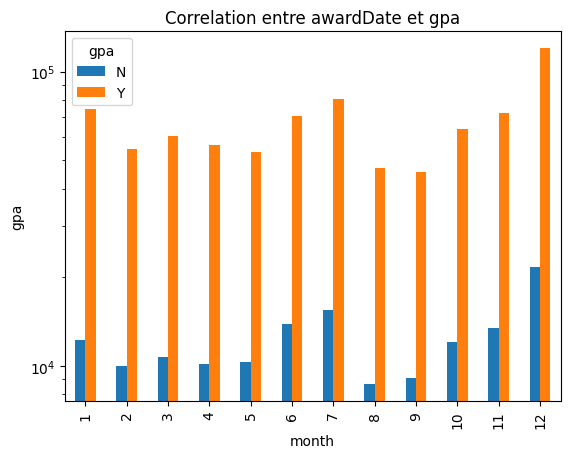

In [385]:
plot_categorial_categorical(
    data=gb_1,
    title="Correlation entre awardDate et gpa",
    xlabel="month",
    ylabel="gpa",
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre awardDate et typeOfContract

## Graphe de corrélation

In [386]:
df = lots[['awardDate', 'typeOfContract']]

In [387]:
df

,awardDate,typeOfContract
0,2009-09-24,W
1,2009-09-24,W
2,2009-09-24,W
3,2009-09-28,W
4,2009-11-06,W
...,...,...
1380960,2020-12-28,S
1380961,2020-12-10,S
1380962,2020-12-17,S
1380963,2020-12-11,S


In [388]:
df = process_date(df)

In [389]:
df

,awardDate,typeOfContract,month,year,semester,quarter
0,2009-09-24,W,9,2009,Semestre 2,Trimestre 3
1,2009-09-24,W,9,2009,Semestre 2,Trimestre 3
2,2009-09-24,W,9,2009,Semestre 2,Trimestre 3
3,2009-09-28,W,9,2009,Semestre 2,Trimestre 3
4,2009-11-06,W,11,2009,Semestre 2,Trimestre 4
...,...,...,...,...,...,...
1380960,2020-12-28,S,12,2020,Semestre 2,Trimestre 4
1380961,2020-12-10,S,12,2020,Semestre 2,Trimestre 4
1380962,2020-12-17,S,12,2020,Semestre 2,Trimestre 4
1380963,2020-12-11,S,12,2020,Semestre 2,Trimestre 4


In [390]:
gb_1 = df.groupby(['month','typeOfContract']).size().unstack(fill_value=0)

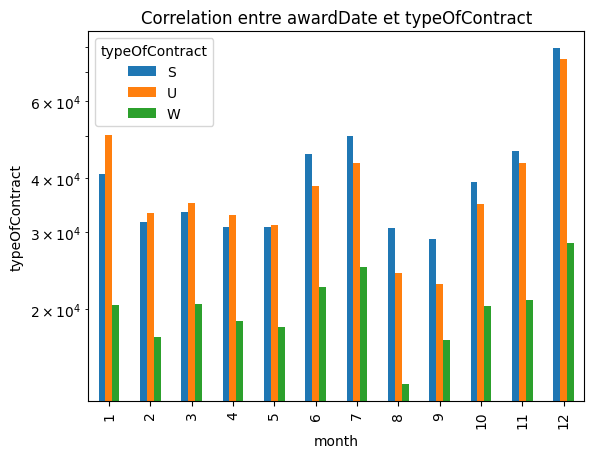

In [391]:
plot_categorial_categorical(
    data=gb_1,
    title="Correlation entre awardDate et typeOfContract",
    xlabel="month",
    ylabel="typeOfContract",
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre awardDate et topType

## Graphe de corrélation

In [392]:
df = lots[['awardDate', 'topType']]

In [393]:
df

,awardDate,topType
0,2009-09-24,OPE
1,2009-09-24,OPE
2,2009-09-24,OPE
3,2009-09-28,OPE
4,2009-11-06,RES
...,...,...
1380960,2020-12-28,NIC
1380961,2020-12-10,NIC
1380962,2020-12-17,NIC
1380963,2020-12-11,NOC


In [394]:
df = process_date(df)

In [401]:
gb_1 = df.groupby(['quarter','topType']).size().unstack(fill_value=0)

In [402]:
gb_1

topType,AWP,COD,INP,NIC,NIP,NOC,NOP,OPE,RES
quarter,,,,,,,,,
Trimestre 1,13531,609,5,19668,212,4014,65,239697,4821
Trimestre 2,16452,629,3,17928,198,3899,92,225323,4664
Trimestre 3,15327,613,7,19251,253,3737,107,211315,4626
Trimestre 4,15795,747,13,21244,469,5008,239,336194,7483


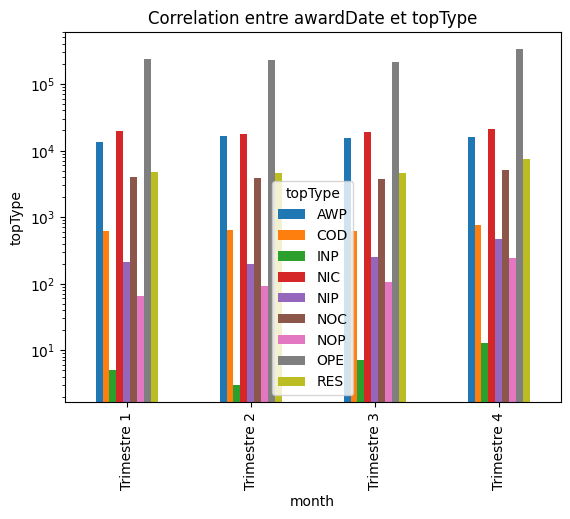

In [403]:
plot_categorial_categorical(
    data=gb_1,
    title="Correlation entre awardDate et topType",
    xlabel="month",
    ylabel="topType",
    logy=True
)

## Coéfficient de corrélation

# Corrélation entre awardDate et renewal

## Graphe de corrélation

In [404]:
df = lots[['awardDate', 'renewal']]

In [405]:
df

,awardDate,renewal
0,2009-09-24,NaN
1,2009-09-24,NaN
2,2009-09-24,NaN
3,2009-09-28,NaN
4,2009-11-06,NaN
...,...,...
1380960,2020-12-28,NaN
1380961,2020-12-10,NaN
1380962,2020-12-17,NaN
1380963,2020-12-11,NaN


In [406]:
df = process_date(df)

In [407]:
gb_1 = df.groupby(['month','renewal']).size().unstack(fill_value=0)

In [408]:
gb_1

renewal,N,Y
month,,
1,15849,39882
2,12034,30200
3,12882,32222
4,12728,29163
5,12507,26177
6,17381,35364
7,20995,42378
8,11604,25566
9,12278,24208


## Coéfficient de corrélation

# Corrélation entre awardDate et contractDuration

## Graphe de corrélation

In [409]:
df = lots[['awardDate', 'contractDuration']]

## Coéfficient de corrélation

# Corrélation entre awardDate et publicityDuration

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre awardPrice et numberTenders

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre awardPrice et onBehalf

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre awardPrice et fraAgreement

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre awardPrice et lotsNumber

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre awardPrice et outOfDirectives

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre awardPrice et subContracted

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre awardPrice et gpa

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre awardPrice et typeOfContract

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre awardPrice et topType

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre awardPrice et renewal

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre awardPrice et contractDuration

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre awardPrice et publicityDuration

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre numberTenders et onBehalf

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre numberTenders et fraAgreement

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre numberTenders et lotsNumber

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre numberTenders et outOfDirectives

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre numberTenders et subContracted

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre numberTenders et gpa

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre numberTenders et typeOfContract

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre numberTenders et topType

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre numberTenders et renewal

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre numberTenders et contractDuration

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre numberTenders et publicityDuration

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre onBehalf et fraAgreement

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre onBehalf et lotsNumber

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre onBehalf et outOfDirectives

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre onBehalf et subContracted

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre onBehalf et gpa

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre onBehalf et typeOfContract

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre onBehalf et topType

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre onBehalf et renewal

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre onBehalf et contractDuration

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre onBehalf et publicityDuration

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre fraAgreement et lotsNumber

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre fraAgreement et outOfDirectives

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre fraAgreement et subContracted

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre fraAgreement et gpa

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre fraAgreement et typeOfContract

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre fraAgreement et topType

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre fraAgreement et renewal

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre fraAgreement et contractDuration

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre fraAgreement et publicityDuration

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre lotsNumber et outOfDirectives

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre lotsNumber et subContracted

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre lotsNumber et gpa

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre lotsNumber et typeOfContract

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre lotsNumber et topType

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre lotsNumber et renewal

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre lotsNumber et contractDuration

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre lotsNumber et publicityDuration

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre outOfDirectives et subContracted

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre outOfDirectives et gpa

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre outOfDirectives et typeOfContract

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre outOfDirectives et topType

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre outOfDirectives et renewal

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre outOfDirectives et contractDuration

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre outOfDirectives et publicityDuration

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre subContracted et gpa

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre subContracted et typeOfContract

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre subContracted et topType

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre subContracted et renewal

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre subContracted et contractDuration

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre subContracted et publicityDuration

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre gpa et typeOfContract

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre gpa et topType

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre gpa et renewal

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre gpa et contractDuration

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre gpa et publicityDuration

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre typeOfContract et topType

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre typeOfContract et renewal

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre typeOfContract et contractDuration

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre typeOfContract et publicityDuration

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre topType et renewal

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre topType et contractDuration

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre topType et publicityDuration

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre renewal et contractDuration

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre renewal et publicityDuration

## Graphe de corrélation

## Coéfficient de corrélation

# Corrélation entre contractDuration et publicityDuration

## Graphe de corrélation

## Coéfficient de corrélation